In [2]:
from scipy.stats import truncnorm
import pandas as pd
import numpy as onp
import itertools
import datetime
import tqdm
import sys
import os

import matplotlib.pyplot as plt

def flatten_list(list_array):
    return list(itertools.chain(*list_array))

sys.path.insert(0,"../")
from global_config import config

results_dir           = config.get_property('results_dir')
data_dir              = config.get_property('data_dir')
paper_dir             = config.get_property('paper_dir')
data_db_dir           = config.get_property('data_db_dir')
feb_hosp_records_path = os.path.join(data_db_dir, 'long_files_8_25_2021')
path_to_save          = os.path.join(results_dir, "real_testing", "community")


COLOR_LIST1 = ["#F8AFA8", "#FDDDA0", "#F5CDB4", "#74A089"]

In [3]:
def amro2cute(amro):
    if amro == 'ESCHERICHIA COLI':
        return "e_coli"
    elif amro == 'KLEBSIELLA PNEUMONIAE':
        return "k_pneumoniae"
    elif amro=="PSEUDOMONAS AERUGINOSA":
        return "p_aeruginosa"
    elif amro=="METHICILLIN-SUSCEPTIBLE STAPHYLOCOCCUS AUREUS":
        return "mssa"
    elif amro=="METHICILLIN-RESISTANT STAPHYLOCOCCUS AUREUS":
        return "mrsa"
    elif amro=="STAPHYLOCOCCUS EPIDERMIDIS":
        return "s_epidermidis"
    elif amro=="ENTEROCOCCUS FAECALIS":
        return "e_faecalis"
    elif amro=="ENTEROCOCCUS FAECIUM":
        return "e_faecium"

<AxesSubplot: xlabel='rho', ylabel='beta'>

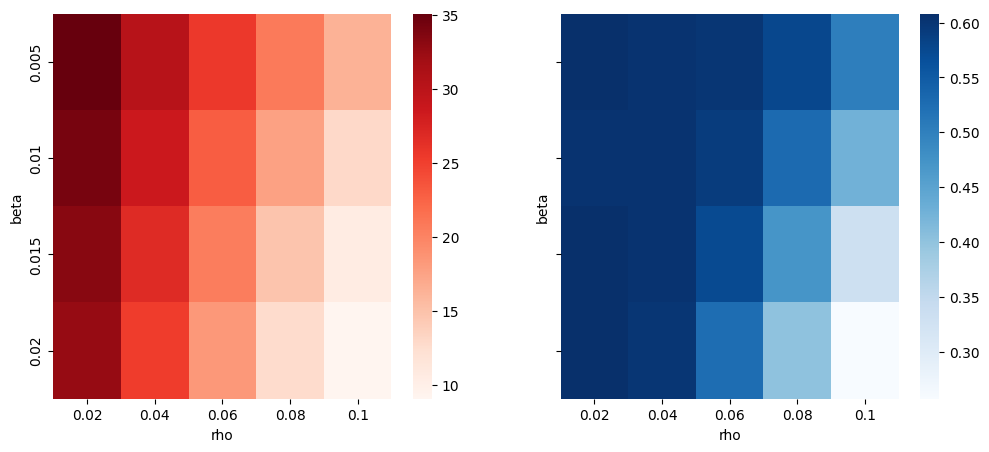

In [14]:
amro_search = ['ESCHERICHIA COLI', 'KLEBSIELLA PNEUMONIAE', 'PSEUDOMONAS AERUGINOSA', 'METHICILLIN-SUSCEPTIBLE STAPHYLOCOCCUS AUREUS',
                'METHICILLIsN-RESISTANT STAPHYLOCOCCUS AUREUS', 'STAPHYLOCOCCUS EPIDERMIDIS', 'ENTEROCOCCUS FAECALIS', 'ENTEROCOCCUS FAECIUM']

amro         = amro_search[0]
crps_amro_df = pd.read_csv( os.path.join("preliminary_results", f"crps_{amro2cute(amro)}.csv"), index_col=None).drop(columns=['Unnamed: 0'])
crps_amro_df

hm_crps_df = crps_amro_df.pivot(index='beta', columns='rho', values='crps')
hm_cov_df  = crps_amro_df.pivot(index='beta', columns='rho', values='calibration_score')

import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.heatmap(ax=ax[0], data=hm_crps_df, cmap='Reds')
sns.heatmap(ax=ax[1], data=hm_cov_df,  cmap='Blues')

In [9]:
crps_amro_df

,crps,calibration_score,beta,rho
0,35.083667,0.608114,0.005,0.02
1,34.244512,0.603728,0.010,0.02
2,33.329304,0.608114,0.015,0.02
3,32.549293,0.608114,0.020,0.02
4,30.270019,0.603728,0.005,0.04
5,28.550284,0.603728,0.010,0.04
6,26.772740,0.603728,0.015,0.04
7,25.285723,0.599342,0.020,0.04
8,25.636847,0.599342,0.005,0.06
9,22.990114,0.590570,0.010,0.06
